In [ ]:
import numpy as np

Summary
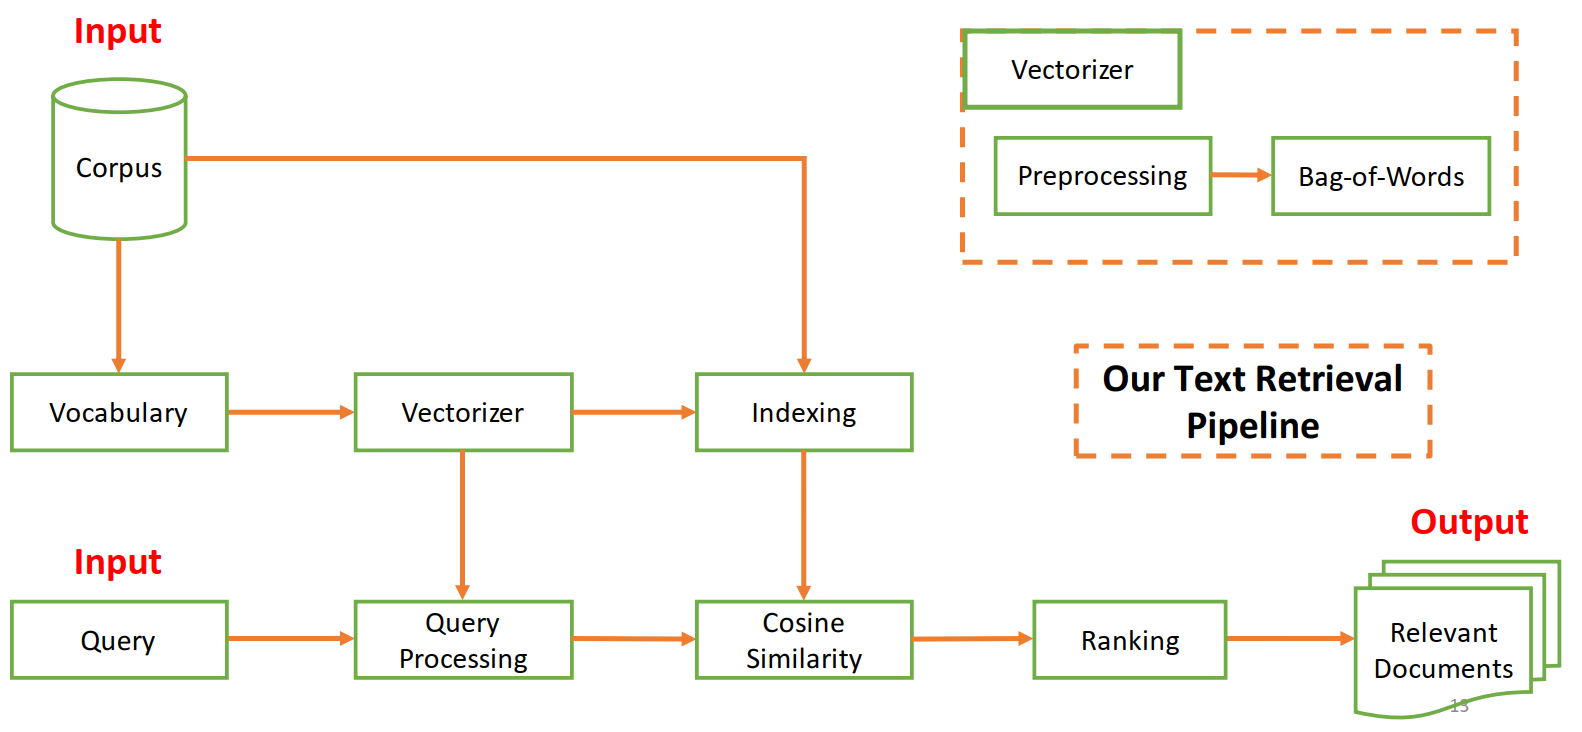

In [ ]:
%cd /content/drive/MyDrive/AI_Course/Module_02/94_PT_TextRetrievalProject
!ls

/content/drive/MyDrive/AI_Course/Module_02/94_PT_TextRetrievalProject
'230714 - M02PT03 - Text Retrieval Project - TA_Thang'	 __MACOSX
'230714 - Text Retrieval Project - TA_Thang.zip'	 TextRetrieval.ipynb


In [ ]:
! pip install datasets==2.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset('ms_marco', 'v1.1')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/10047 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/82326 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9650 [00:00<?, ? examples/s]

Dataset ms_marco downloaded and prepared to /root/.cache/huggingface/datasets/ms_marco/v1.1/1.1.0/b6a62715fa5219aea5275dd3556601004cd63945cb63e36e022f77bb3cbbca84. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(dataset)
subset = dataset['test']

DatasetDict({
    validation: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 10047
    })
    train: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 82326
    })
    test: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 9650
    })
})


In [ ]:
print(subset)
test = {}
for sample in subset:
  query_type = sample ['query_type']
  if query_type not in test:
    test[query_type] = 1
  else:
    test[query_type] +=1

print(test)



Dataset({
    features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
    num_rows: 9650
})
{'description': 5316, 'numeric': 2705, 'entity': 902, 'location': 501, 'person': 226}


In [ ]:
queries_infos = []
queries = []
corpus = []

create corpus

In [ ]:
for sample in subset :
  query_type = sample ['query_type']
  # only get sample of query_type = entity
  if query_type != 'entity':
    continue
  query_id  = sample['query_id']
  # print(query_id)
  query_str = sample['query']
  # print(query_str)
  passages_dict = sample['passages']
  # print(passages_dict)
  # print(type(passages_dict['is_selected']))
  is_selected_lst = passages_dict['is_selected']
  # print(len(is_selected_lst))
  # print(is_selected_lst)
  passage_text_lst = passages_dict['passage_text']
  query_info ={
      'query_id': query_id,
      'query'   : query_str,
      'relevant_docs' : []
  }
  # print(query_info)

  current_len_corpus = len(corpus)
  for idx in range(len(is_selected_lst)):
    if is_selected_lst[idx] == 1 :
      doc_idx = current_len_corpus + idx
      query_info['relevant_docs'].append(doc_idx)
  # print(query_info)
  if query_info ['relevant_docs'] == []:
    continue

  queries.append(query_str)
  # print('queries',queries)
  queries_infos.append(query_info)
  # print('queries_infos',queries_infos)
  corpus += passage_text_lst
  # print('corpus',corpus)
print(len(queries))
print(len(queries_infos))
print(len(corpus))


878
878
7303


Build text nomolize
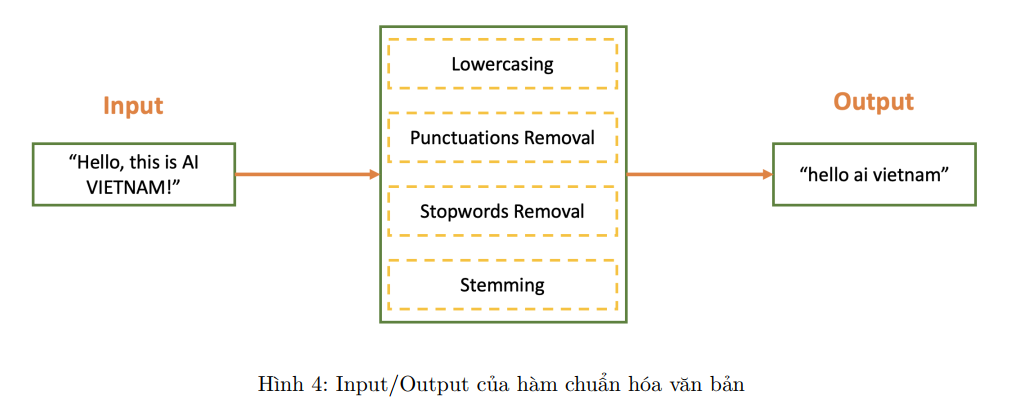

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')
english_stopwords = stopwords.words('english')
remove_chars = string.punctuation
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(english_stopwords)
print(remove_chars)
print(stemmer)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def tokenize(text):
  return text.split()

In [ ]:
def text_normalize(text):
  text = text.lower()
  for char in remove_chars:
    text = text.replace(char,'')

  text = ' '.join([ word for word in tokenize (text ) if word not in
              english_stopwords ])
  text = ' '.join([stemmer.stem(word) for word in tokenize(text)])
  return text

In [ ]:
doc1 = "Read AI book"
print(doc1)
print(text_normalize(doc1))

Read AI book
read ai book


Create dictionary

In [ ]:
def create_dictionary( corpus ):
  dictionary = []
  for doc in corpus :
    normalized_doc = text_normalize(doc)
    tokens = tokenize(normalized_doc)
    for token in tokens :
      if token not in dictionary :
        dictionary.append( token )

  return dictionary

Vectorize docs

In [ ]:
def vectorize(text , dictionary ):
  text = text_normalize(text)
  word_count_dict = { word : 0 for word in dictionary }
  tokens = tokenize( text )
  for token in tokens :
    # print(token)
    try:
      word_count_dict[token] += 1
    except:
      pass
  # print(word_count_dict)
  vector = list(word_count_dict.values())
  return vector

In [ ]:
doc1 = "Read AI book"
doc2 = "Machine Learning book"
doc3 = "Learning how AI learns"
testCorpus = []
testCorpus.append(doc1)
testCorpus.append(doc2)
testCorpus.append(doc3)
dictTest = create_dictionary(testCorpus)
print(dictTest)
test1 = vectorize(doc1,dictTest)
test2 = vectorize(doc2,dictTest)
test3 = vectorize(doc3,dictTest)
print(test1,test2,test3)

['read', 'ai', 'book', 'machin', 'learn']
[1, 1, 1, 0, 0] [0, 0, 1, 1, 1] [0, 1, 0, 0, 2]


In [ ]:
def create_doc_term_matrix ( corpus , dictionary ):
  doc_term_matrix = {}
  for idx , doc in enumerate(corpus):
    normalized_doc = text_normalize(doc)
    vector = vectorize( normalized_doc , dictionary )
    doc_term_matrix[(doc,idx)] = vector

  return doc_term_matrix

In [ ]:
from scipy import spatial

def similarity (a, b):
  return 1-spatial.distance.cosine(a, b)


In [ ]:
doc_1 = [2, 1, 0, 0, 3, 2]
doc_2= [2, 0, 1, 1, 0, 0]
doc_3= [1, 1, 1, 1, 1, 1]
doc_4= [1, 2, 3, 0, 0, 0]
vector = [3, 1, 0, 0, 2, 1]
print(similarity(doc_1,vector))
print(similarity(doc_2,vector))
print(similarity(doc_3,vector))
print(similarity(doc_4,vector))

0.9128709291752769
0.6324555320336759
0.7378647873726218
0.3450327796711772


vecterize query -> similarity -> rank

In [ ]:
def ranking (query , dictionary , doc_term_matrix ):
  normalized_query = text_normalize( query )
  query_vec = vectorize( normalized_query , dictionary )
  scores = []
  for doc_info , doc_vec in doc_term_matrix.items():
    sim  = similarity (query_vec,doc_vec )
    scores.append(( sim , doc_info ))
    scores.sort( reverse = True )
  return scores


In [ ]:
dictionary = create_dictionary(corpus)
doc_term_matrix =  create_doc_term_matrix(corpus,dictionary)
print(type(dictionary))
print(type(doc_term_matrix))

<class 'list'>
<class 'dict'>


In [ ]:
for doc,vector in doc_term_matrix.items():
  print(doc)
  print(vector)
  print(abc)
  if(doc[1] == 10):
    break

('SUBPHYLUM CHELICERATA, CLASS ARACHNIDA. Spiders. This group contains many familiar organisms, including the spiders, mites, scorpions and ticks. Examine the large spider on the right. Again, notice that there are two body regions, a cephalothorax and an abdomen. On the cephalothorax are two to four pairs of simple eyes.', 0)
[1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

NameError: ignored

In [ ]:

query_lst = ['what is the official language in Fiji ']
top_k = 10
for query in query_lst :
  scores = ranking(query , dictionary , doc_term_matrix )
  print (f'Query : { query }')
  print ('=== Relevant docs === ')
  for idx in range ( top_k ):
    doc_score = scores [idx ][0]
    doc_content = scores [idx ][1][0]

    print (f'Top { idx + 1}; Score : { doc_score :.4f}')
    print ( doc_content )
    print ('\n')

Query : what is the official language in Fiji 
=== Relevant docs === 
Top 1; Score : 0.6556
The official languages in Fiji are Fijian and English. A dialect of Hindustani is also widely spoken among Indo-Fijians.  _________________________________________   T … he official and everyday language of Fiji is English. Fijian and Fiji-Hindi are second languages in the island nation.


Top 2; Score : 0.6556
The official languages in Fiji are Fijian and English. A dialect of Hindustani is also widely spoken among Indo-Fijians.  _________________________________________   T … he official and everyday language of Fiji is English. Fijian and Fiji-Hindi are second languages in the island nation.


Top 3; Score : 0.5715
The official languages. Fiji’s 1997 Constitution established Fijian as one of the official languages of the country. Fijian is an Austronesian language, a grouping that includes thousands of other languages spanning the globe. The language is of the Malayo-Polynesian family, not to